Epoch 1/100
140/140 [==============================] - 5s 14ms/step - loss: 0.3436 - accuracy: 0.9257 - val_loss: 0.1278 - val_accuracy: 0.9821
Epoch 2/100
140/140 [==============================] - 1s 8ms/step - loss: 0.0726 - accuracy: 0.9892 - val_loss: 0.0605 - val_accuracy: 0.9857
Epoch 3/100
140/140 [==============================] - 1s 6ms/step - loss: 0.0268 - accuracy: 0.9955 - val_loss: 0.0514 - val_accuracy: 0.9865
Epoch 4/100
140/140 [==============================] - 1s 4ms/step - loss: 0.0120 - accuracy: 0.9987 - val_loss: 0.0498 - val_accuracy: 0.9848
Epoch 5/100
140/140 [==============================] - 1s 4ms/step - loss: 0.0065 - accuracy: 0.9993 - val_loss: 0.0516 - val_accuracy: 0.9848
Epoch 6/100
140/140 [==============================] - 1s 4ms/step - loss: 0.0044 - accuracy: 0.9996 - val_loss: 0.0549 - val_accuracy: 0.9857
Epoch 7/100
140/140 [==============================] - 1s 4ms/step - loss: 0.0032 - accuracy: 0.9996 - val_loss: 0.0564 - val_accuracy: 0.985

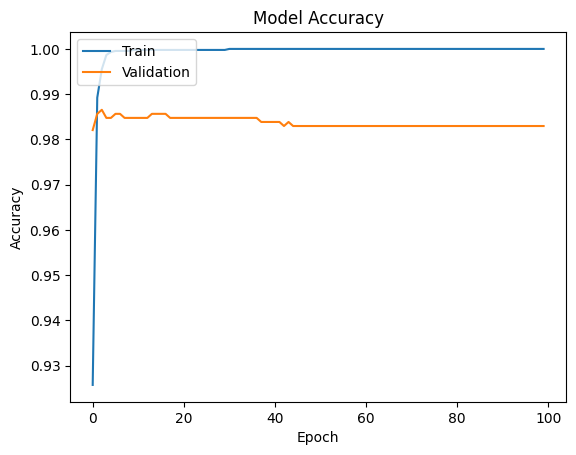

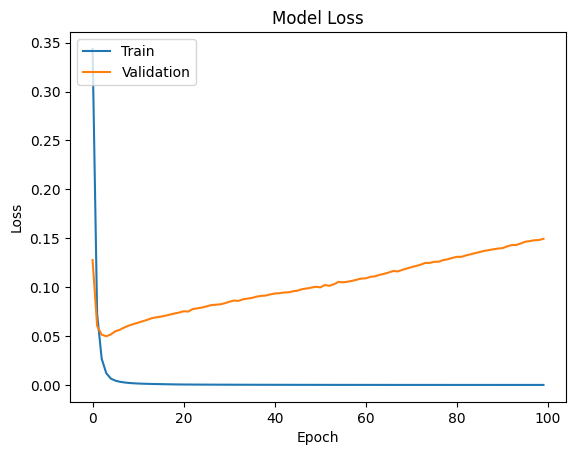

35/35 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       970
           1       0.98      0.89      0.93       145

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

[[967   3]
 [ 16 129]]


In [22]:
# Import the necessary libraries
import numpy as np                              # For numerical computations
import pandas as pd                             # For handling datasets
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.feature_extraction.text import CountVectorizer # For converting text to numerical features
import scipy.sparse                             # For working with sparse matrices
from keras.models import Sequential             # For creating a neural network model
from keras.layers import Dense                  # For adding layers to the neural network
from sklearn.metrics import classification_report



# Load the dataset
dataset = pd.read_csv('spam.csv')

# Replace NaN values with empty strings
dataset = dataset.fillna('')
X = dataset['Text'].values                       # Extract the text from the dataset
y = dataset['Class'].values                      # Extract the target variable (label) from the dataset


# Convert the text to numerical features using bag-of-words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Total number of samples
n_samples = X.shape[0]
n_train = int(n_samples * 0.8) # Use 80% of samples for training

# Create the sparse matrix for the training and testing data
X_train = scipy.sparse.csr_matrix(X[:n_train, :])
X_test = scipy.sparse.csr_matrix(X[n_train:, :])

# Sort the indices of the sparse matrix
X_train.sort_indices()
X_test.sort_indices()

# Split the dataset into training and testing sets, with 80% for training and 20% for testing
y_train = y[:n_train]
y_test = y[n_train:]


# Create the neural network model
model = Sequential()                            # Create an instance of the sequential model
model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1])) # Add a dense layer with 16 units and ReLU activation function as the input layer
model.add(Dense(units=8, activation='relu'))    # Add a dense layer with 8 units and ReLU activation function
model.add(Dense(units=1, activation='sigmoid')) # Add a dense layer with 1 unit and sigmoid activation function as the output layer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Compile the model with the Adam optimizer, binary cross-entropy loss function, and accuracy metric


import matplotlib.pyplot as plt

# Train the model and save the history
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))  # Train the model on the training data with a batch size of 32, 100 epochs, and validation data for evaluating the model's performance during training

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Test the model and get the classification report
y_pred = model.predict(X_test)                 # Use the trained model to predict the target variable for the testing data
y_pred = (y_pred > 0.5)                        # Convert the predicted probabilities to binary predictions (1 if the probability is greater than 0.5, 0 otherwise)
print(classification_report(y_test, y_pred))

# Evaluate the model
from sklearn.metrics import confusion_matrix   # Import the confusion matrix from sklearn
cm = confusion_matrix(y_test, y_pred)           # Compute the confusion matrix using the predicted and actual target variables for the testing data
print(cm)                                       # Print the confusion matrix
